# Mixing State Indices Boxplot

This script generates `Figure 8. Aggregated statistics of aerosol mixing indices ...`

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
ds_s = xr.open_dataset("../nc_files/f09_mask.nc")
chi_abd=ds_s["chi_abd"].sel(season=["DJF","JJA"]).to_dataframe().reset_index()
chi_hyg=ds_s["chi_hyg"].sel(season=["DJF","JJA"]).to_dataframe().reset_index()
chi_opt1=ds_s["chi_opt1"].sel(season=["DJF","JJA"]).to_dataframe().reset_index()

merge_1=chi_abd.merge(chi_opt1,on=["lat","lon","season"],how="outer")
merge_data=merge_1.merge(chi_hyg,on=["lat","lon","season"],how="outer")

merge_data_new = merge_data.set_index(["lat","lon","season"]).stack()\
.reset_index(name="mixing_state_index")\
.rename(columns={'level_3':'mixing_state_type'})

north = merge_data_new[merge_data_new["lat"]>=0]
south = merge_data_new[merge_data_new["lat"]<0]

## Plotting

In [3]:
p = matplotlib.rcParams
p["font.family"] = "sans-serif"
p["font.sans-serif"] = ["SimHei", "Tahoma"]
p["font.size"] = 20
p["axes.unicode_minus"] = False
p["figure.figsize"] = (14.20, 10) 

p["figure.dpi"] = 200
p["figure.subplot.left"] = 0.06   
p["figure.subplot.right"] = 0.98   
p["figure.subplot.bottom"] = 0.1  
p["figure.subplot.top"] = 0.9   
p["figure.subplot.wspace"] = 0.20
p["figure.subplot.hspace"] = 0.2

rc={'axes.labelsize': 25,
    'font.size': 25, 'legend.fontsize': 25, 
    'axes.titlesize': 25,
    'xtick.labelsize': 25,
    'ytick.labelsize': 25}
plt.rcParams.update(**rc)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


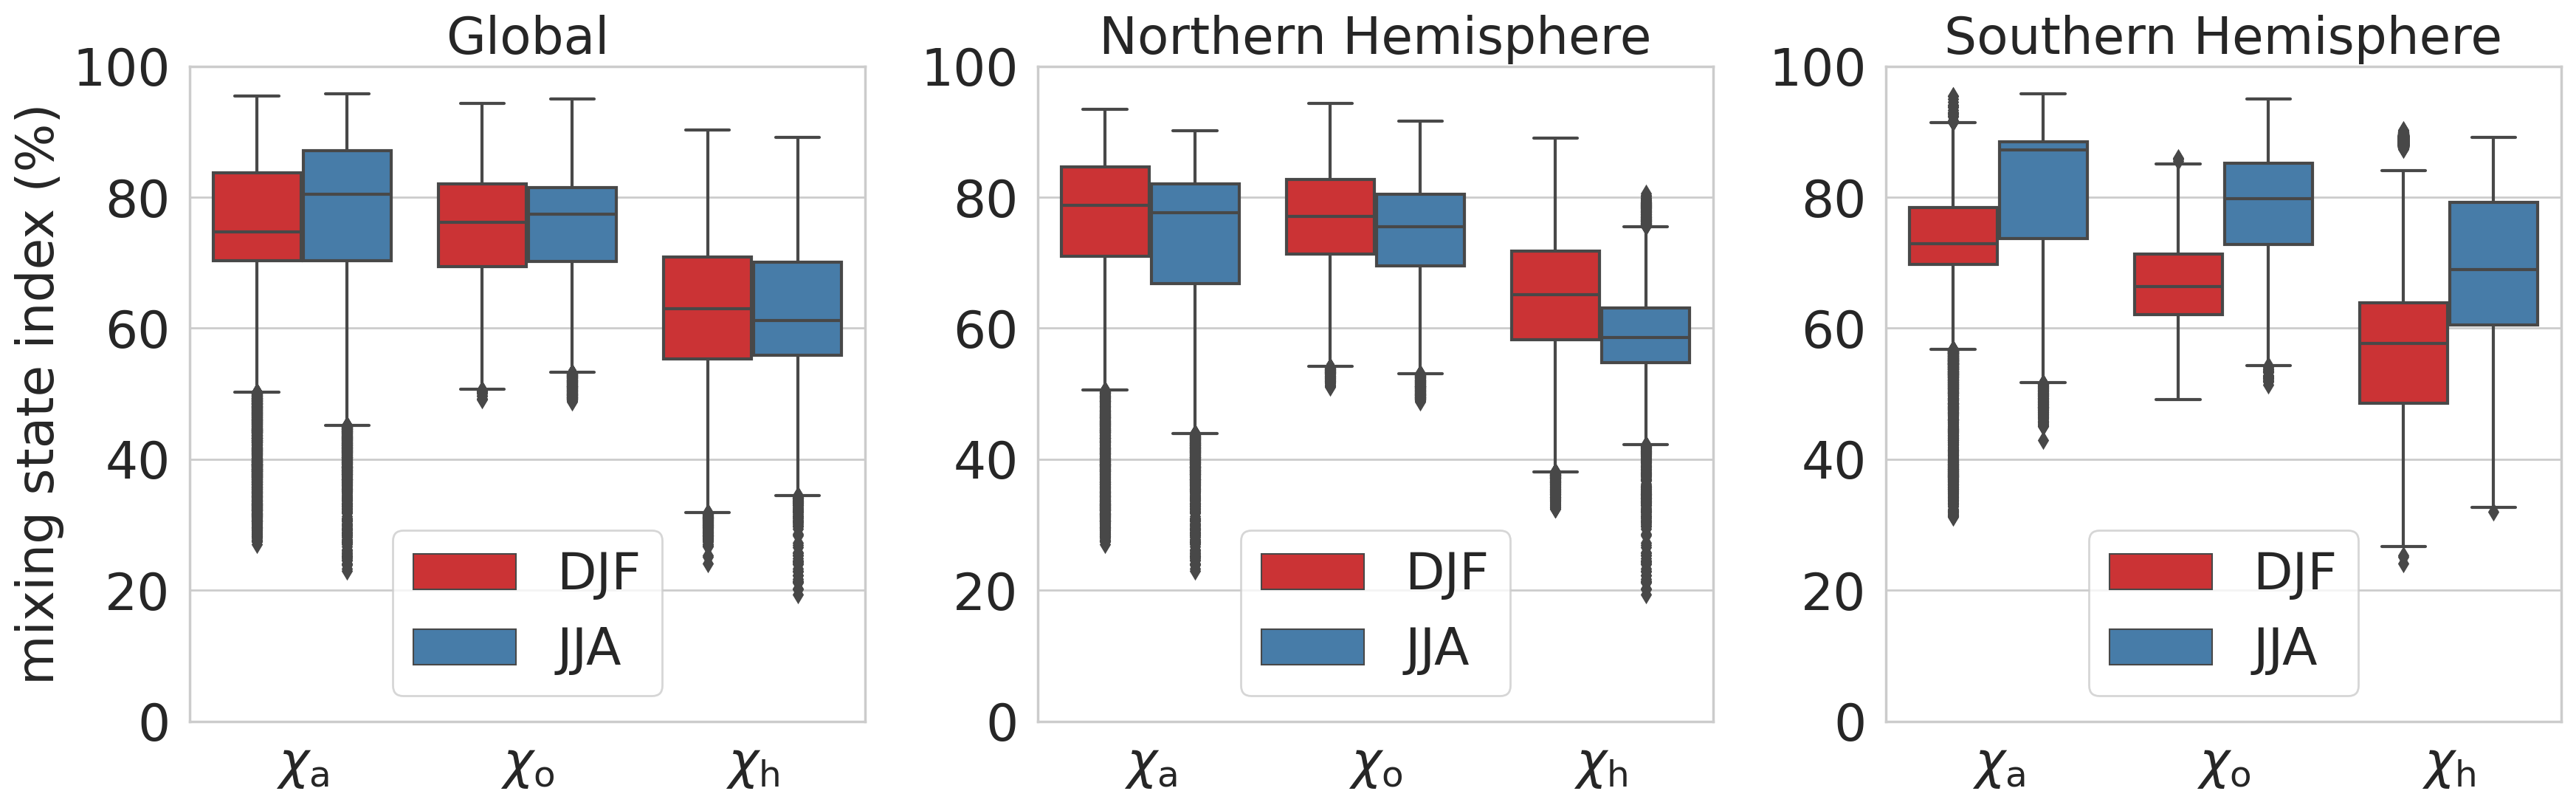

In [4]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,6))

# overall
s1=sns.boxplot(x="mixing_state_type", 
            ax=ax1,
            y="mixing_state_index", 
            hue="season", 
            data=merge_data_new,
            palette="Set1")
ax1.set_title("Global")
ax1.set_ylim([0, 100]) 
ax1.set_ylabel(r"mixing state index (%)")
ax1.set_xlabel("")
s1.set(xticklabels=[r"$\chi_{\rm{a}}$",
                    r"$\chi_{\rm{o}}$",
                    r"$\chi_{\rm{h}}$",])
ax1.legend(loc='lower center')

# north
s2=sns.boxplot(x="mixing_state_type", 
                  ax=ax2,
                 y="mixing_state_index", 
                 hue="season", 
                 data=north,
                palette="Set1")
ax2.set_title("Northern Hemisphere")
ax2.set_ylim([0, 100]) 
ax2.set_ylabel("")
ax2.set_xlabel("")
s2.set(xticklabels=[r"$\chi_{\rm{a}}$",
                    r"$\chi_{\rm{o}}$",
                    r"$\chi_{\rm{h}}$",])
ax2.legend(loc='lower center')

# south
s3=sns.boxplot(x="mixing_state_type", 
                  ax=ax3,
                 y="mixing_state_index", 
                 hue="season", 
                 data=south,
                palette="Set1")
ax3.set_title("Southern Hemisphere")
ax3.set_ylim([0, 100]) 
ax3.set_ylabel("")
ax3.set_xlabel("")
s3.set(xticklabels=[r"$\chi_{\rm{a}}$",
                    r"$\chi_{\rm{o}}$",
                    r"$\chi_{\rm{h}}$",])
ax3.legend(loc='lower center')

plt.tight_layout()
plt.savefig("../../figures/mixing_state_boxplot.pdf")
plt.show()

In [5]:
north.groupby(["mixing_state_type","season"])["mixing_state_index"].describe()

count       mean        std        min        25%  \
mixing_state_type season                                                        
chi_abd           DJF     27648.0  75.915634  11.170289  27.061340  70.962856   
                  JJA     27648.0  73.297813  11.227946  22.932678  66.810204   
chi_hyg           DJF     26964.0  63.955841   9.089479  32.438747  58.273760   
                  JJA     27449.0  59.151207   7.157384  19.326889  54.725376   
chi_opt1          DJF     25802.0  76.182289   8.150284  51.016762  71.297848   
                  JJA     24358.0  74.335548   7.842571  48.747944  69.477997   

                                50%        75%        max  
mixing_state_type season                                   
chi_abd           DJF     78.814350  84.584463  93.431473  
                  JJA     77.652615  82.062723  90.140694  
chi_hyg           DJF     65.127678  71.759338  89.040291  
                  JJA     58.640697  63.052902  80.554474  
chi_opt1          DJF     77.091358  82.743402  94.370903  
                  JJA     75.462536  80.427765  91.651100

In [6]:
south.groupby(["mixing_state_type","season"])["mixing_state_index"].describe()

count       mean        std        min        25%  \
mixing_state_type season                                                        
chi_abd           DJF     26842.0  73.279053   9.830002  31.217319  69.749159   
                  JJA     26389.0  81.481895  10.347087  42.862198  73.744049   
chi_hyg           DJF     11356.0  59.351746  15.601750  24.101732  48.518337   
                  JJA     20538.0  68.553879  11.582892  31.942762  60.474914   
chi_opt1          DJF      3038.0  66.429405   7.194128  49.112278  62.114587   
                  JJA     12711.0  78.513840   7.797181  51.424950  72.801769   

                                50%        75%        max  
mixing_state_type season                                   
chi_abd           DJF     72.908878  78.404114  95.505226  
                  JJA     87.213707  88.476196  95.841545  
chi_hyg           DJF     57.694237  63.912782  90.213753  
                  JJA     68.999538  79.215839  89.176903  
chi_opt1          DJF     66.324547  71.322880  85.967453  
                  JJA     79.777908  85.138329  94.973610